In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Combines the 4 files with 2 sheets into one singular excel file
excel_files = ["Ab12B2-NR_Infected and Healthy Deer Sensing.xlsx", "Ab SHA31-Spheres_Infected and Healthy Deer Sensing.xlsx", "Ab SHA31-NR_Infected and Healthy Deer Sensing.xlsx", "Ab12B2-Spheres_Infected and Healthy Deer Sensing.xlsx"]
combined_data = pd.DataFrame()
dfs = []

for file in excel_files:
  xls = pd.ExcelFile(file)

  sheets_dict = pd.read_excel(xls, sheet_name=None)

  sheet1 = sheets_dict['Sheet1']
  sheet2 = sheets_dict['Sheet2']

  Health_Status = sheet1.iloc[9, 12]
  antibodies = sheet1.iloc[10, 12]
  NiMoO4 = sheet1.iloc[11, 12]
  sheet1 = sheet1.drop(sheet1.columns[[10, 12]], axis=1)
  sheet1 = sheet1.drop(sheet1.columns[[10]], axis=1)
  sheet1['AntiBodies'] = antibodies
  sheet1['NiMoO4 type'] = NiMoO4
  sheet1['Deer Health Status'] = Health_Status


  Health_Status = sheet2.iloc[9, 12]
  antibodies = sheet2.iloc[10, 12]
  NiMoO4 = sheet2.iloc[11, 12]
  sheet2 = sheet2.drop(sheet2.columns[[10, 12]], axis=1)
  sheet2 = sheet2.drop(sheet2.columns[[10]], axis=1)
  sheet2['AntiBodies'] = antibodies
  sheet2['NiMoO4 type'] = NiMoO4
  sheet2['Deer Health Status'] = Health_Status

  combined_df = pd.concat([sheet1, sheet2], ignore_index=True)
  dfs.append(combined_df)

new_file = pd.concat(dfs, ignore_index=True)
new_file.to_excel('combined.xlsx', index=False)


In [3]:
df = pd.read_excel("combined.xlsx")

df['AntiBodies'] = df['AntiBodies'].replace('Ab SHA31', 0)
df['AntiBodies'] = df['AntiBodies'].replace('Ab12B2', 1)

df['NiMoO4 type'] = df['NiMoO4 type'].replace('NiMoO4 Nanorods', 0)
df['NiMoO4 type'] = df['NiMoO4 type'].replace('NiMoO4 Nanospheres', 1)

df['Deer Health Status'] = df['Deer Health Status'].replace('Infected Deer', 0)
df['Deer Health Status'] = df['Deer Health Status'].replace('Healthy Deer', 1)

In [4]:
#set x and y values
X = df.iloc[:, [0, 10, 11, 12]]
y = df.iloc[:, 1:10]
#numpy arrays
X = X.values
y = y.values

In [5]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train_scaled = y_train * 1e4
y_test_scaled = y_test * 1e4


In [6]:
#Hyper parameters
batch_size = 4
epochs = 100


In [7]:
model = Sequential()
input_num = 4
output_num = 9


model.add(Dense(32, activation= 'relu', input_dim = input_num))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(output_num))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [8]:
history = model.fit(X_train, y_train_scaled, batch_size=batch_size, epochs=epochs)

Epoch 1/100
280/280 [==============================] - 2s 3ms/step - loss: 0.0758 - mse: 0.0758
Epoch 2/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0650 - mse: 0.0650
Epoch 3/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0568 - mse: 0.0568
Epoch 4/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0369 - mse: 0.0369
Epoch 5/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250
Epoch 6/100
280/280 [==============================] - 1s 2ms/step - loss: 0.0222 - mse: 0.0222
Epoch 7/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0200 - mse: 0.0200
Epoch 8/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0180 - mse: 0.0180
Epoch 9/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 10/100
280/280 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 11/100
280/280 [=================

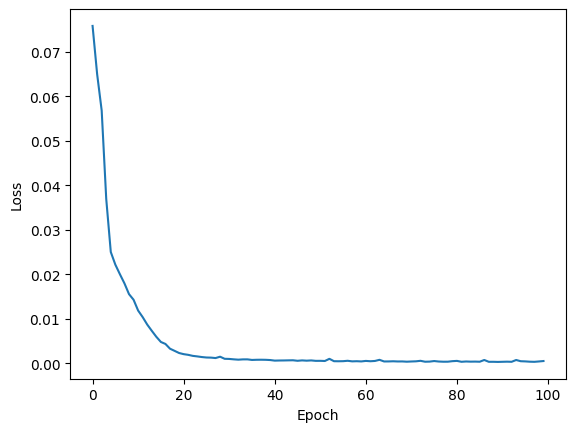

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
loss = model.evaluate(X_test, y_test_scaled)
print(f'Test Loss: {loss}')

9/9 [==============================] - 0s 3ms/step - loss: 4.0704e-04 - mse: 4.0704e-04
Test Loss: [0.0004070369468536228, 0.0004070369468536228]


1/1 [==============================] - 0s 28ms/step


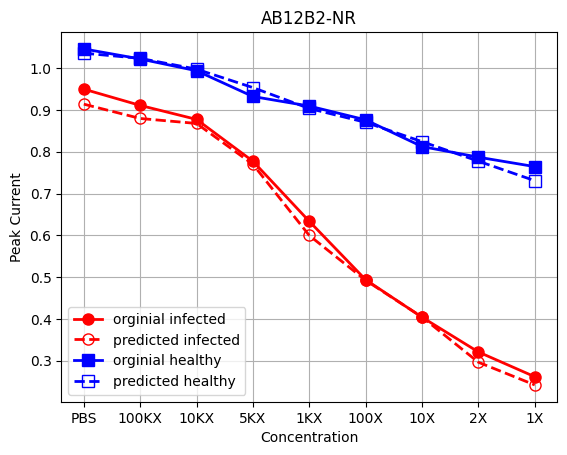

In [12]:
#max for Ab12B2-Nr_Infected and Healthy
xls = pd.ExcelFile("Ab12B2-NR_Infected and Healthy Deer Sensing.xlsx")
sheets_dict = pd.read_excel(xls, sheet_name=None)
sheet1 = sheets_dict['Sheet1']
sheet2 = sheets_dict['Sheet2']

max_values_each_column_infected = sheet1.iloc[:, 1:10].max(axis=0) * 1e4
max_values_each_column_healthy = sheet2.iloc[:, 1:10].max(axis=0) * 1e4

X_test_input = X_test[:, [0, 1, 2, 3]]

# Filter the test data based on conditions
filtered_indices = np.where((X_test_input[:, 1] == 1) & (X_test_input[:, 2] == 0) & (X_test_input[:, 3] == 0))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_infected = [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

filtered_indices = np.where((X_test_input[:, 1] == 1) & (X_test_input[:, 2] == 0) & (X_test_input[:, 3] == 1))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_healthy= [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

columns = ["PBS", "100KX", "10KX", "5KX", "1KX", "100X", "10X", "2X", "1X"]
plt.plot(columns, max_values_each_column_infected, '-o', color='red', linewidth=2, markersize=8, label='orginial Infected')
plt.plot(columns, max_values_infected, '--o', color='red', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Infected')
plt.plot(columns, max_values_each_column_healthy, '-s', color='blue', linewidth=2, markersize=8, label='orginial Healthy')
plt.plot(columns, max_values_healthy, '--s', color='blue', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Healthy')
plt.xlabel('Concentration')
plt.ylabel('Peak Current')
plt.title('AB12B2-NR')
plt.grid(True)
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


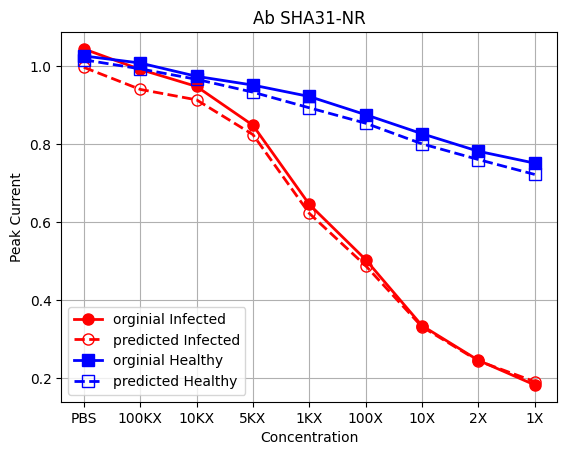

In [14]:
xls = pd.ExcelFile("Ab SHA31-NR_Infected and Healthy Deer Sensing.xlsx")
sheets_dict = pd.read_excel(xls, sheet_name=None)
sheet1 = sheets_dict['Sheet1']
sheet2 = sheets_dict['Sheet2']

max_values_each_column_infected = sheet1.iloc[:, 1:10].max(axis=0) * 1e4
max_values_each_column_healthy = sheet2.iloc[:, 1:10].max(axis=0) * 1e4

X_test_input = X_test[:, [0, 1, 2, 3]]

# Filter the test data based on conditions
filtered_indices = np.where((X_test_input[:, 1] == 0) & (X_test_input[:, 2] == 0) & (X_test_input[:, 3] == 0))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_infected = [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

filtered_indices = np.where((X_test_input[:, 1] == 0) & (X_test_input[:, 2] == 0) & (X_test_input[:, 3] == 1))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_healthy= [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

columns = ["PBS", "100KX", "10KX", "5KX", "1KX", "100X", "10X", "2X", "1X"]
plt.plot(columns, max_values_each_column_infected, '-o', color='red', linewidth=2, markersize=8, label='orginial Infected')
plt.plot(columns, max_values_infected, '--o', color='red', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Infected')
plt.plot(columns, max_values_each_column_healthy, '-s', color='blue', linewidth=2, markersize=8, label='orginial Healthy')
plt.plot(columns, max_values_healthy, '--s', color='blue', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Healthy')
plt.xlabel('Concentration')
plt.ylabel('Peak Current')
plt.title('Ab SHA31-NR')
plt.grid(True)
plt.legend()
plt.show()

2/2 [==============================] - 0s 4ms/step


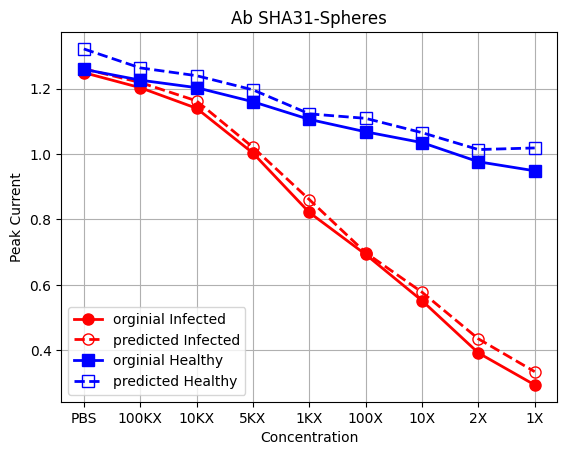

In [18]:
xls = pd.ExcelFile("Ab SHA31-Spheres_Infected and Healthy Deer Sensing.xlsx")
sheets_dict = pd.read_excel(xls, sheet_name=None)
sheet1 = sheets_dict['Sheet1']
sheet2 = sheets_dict['Sheet2']

max_values_each_column_infected = sheet1.iloc[:, 1:10].max(axis=0) * 1e4
max_values_each_column_healthy = sheet2.iloc[:, 1:10].max(axis=0) * 1e4

X_test_input = X_test[:, [0, 1, 2, 3]]

# Filter the test data based on conditions
filtered_indices = np.where((X_test_input[:, 1] == 0) & (X_test_input[:, 2] == 1) & (X_test_input[:, 3] == 0))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_infected = [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

filtered_indices = np.where((X_test_input[:, 1] == 0) & (X_test_input[:, 2] == 1) & (X_test_input[:, 3] == 1))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_healthy= [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

columns = ["PBS", "100KX", "10KX", "5KX", "1KX", "100X", "10X", "2X", "1X"]
plt.plot(columns, max_values_each_column_infected, '-o', color='red', linewidth=2, markersize=8, label='orginial Infected')
plt.plot(columns, max_values_infected, '--o', color='red', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Infected')
plt.plot(columns, max_values_each_column_healthy, '-s', color='blue', linewidth=2, markersize=8, label='orginial Healthy')
plt.plot(columns, max_values_healthy, '--s', color='blue', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Healthy')
plt.xlabel('Concentration')
plt.ylabel('Peak Current')
plt.title('Ab SHA31-Spheres')
plt.grid(True)
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


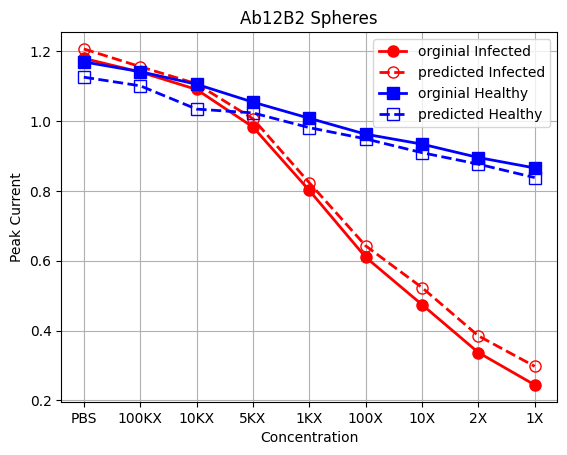

In [19]:
xls = pd.ExcelFile("Ab12B2-Spheres_Infected and Healthy Deer Sensing.xlsx")
sheets_dict = pd.read_excel(xls, sheet_name=None)
sheet1 = sheets_dict['Sheet1']
sheet2 = sheets_dict['Sheet2']

max_values_each_column_infected = sheet1.iloc[:, 1:10].max(axis=0) * 1e4
max_values_each_column_healthy = sheet2.iloc[:, 1:10].max(axis=0) * 1e4

X_test_input = X_test[:, [0, 1, 2, 3]]

# Filter the test data based on conditions
filtered_indices = np.where((X_test_input[:, 1] == 1) & (X_test_input[:, 2] == 1) & (X_test_input[:, 3] == 0))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_infected = [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

filtered_indices = np.where((X_test_input[:, 1] == 1) & (X_test_input[:, 2] == 1) & (X_test_input[:, 3] == 1))
filtered_X_test_input = X_test_input[filtered_indices]

predicted_max_column_1 = model.predict(filtered_X_test_input)[:, 0].max()
predicted_max_column_2 = model.predict(filtered_X_test_input)[:, 1].max()
predicted_max_column_3 = model.predict(filtered_X_test_input)[:, 2].max()
predicted_max_column_4 = model.predict(filtered_X_test_input)[:, 3].max()
predicted_max_column_5 = model.predict(filtered_X_test_input)[:, 4].max()
predicted_max_column_6 = model.predict(filtered_X_test_input)[:, 5].max()
predicted_max_column_7 = model.predict(filtered_X_test_input)[:, 6].max()
predicted_max_column_8 = model.predict(filtered_X_test_input)[:, 7].max()
predicted_max_column_9 = model.predict(filtered_X_test_input)[:, 8].max()

max_values_healthy= [predicted_max_column_1, predicted_max_column_2, predicted_max_column_3, predicted_max_column_4, predicted_max_column_5, predicted_max_column_6, predicted_max_column_7, predicted_max_column_8, predicted_max_column_9]

columns = ["PBS", "100KX", "10KX", "5KX", "1KX", "100X", "10X", "2X", "1X"]
plt.plot(columns, max_values_each_column_infected, '-o', color='red', linewidth=2, markersize=8, label='orginial Infected')
plt.plot(columns, max_values_infected, '--o', color='red', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Infected')
plt.plot(columns, max_values_each_column_healthy, '-s', color='blue', linewidth=2, markersize=8, label='orginial Healthy')
plt.plot(columns, max_values_healthy, '--s', color='blue', linewidth=2, markersize=8, markerfacecolor='none', label='predicted Healthy')
plt.xlabel('Concentration')
plt.ylabel('Peak Current')
plt.title('Ab12B2 Spheres')
plt.grid(True)
plt.legend()
plt.show()